In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt


# Load And Read Data

In [2]:
data = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

In [3]:
data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [4]:
y = data.Outcome.values
x_data = data.drop(["Outcome"],axis=1)

# Normalization of x_data Feature's

In [5]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [6]:
x.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  
0                  0.234415  0.483333  
1                  0.116567  0.166667  
2                  0.253629  0.183333  
3                  0.038002  0.000000  
4                  0.943638  0.200000

# Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

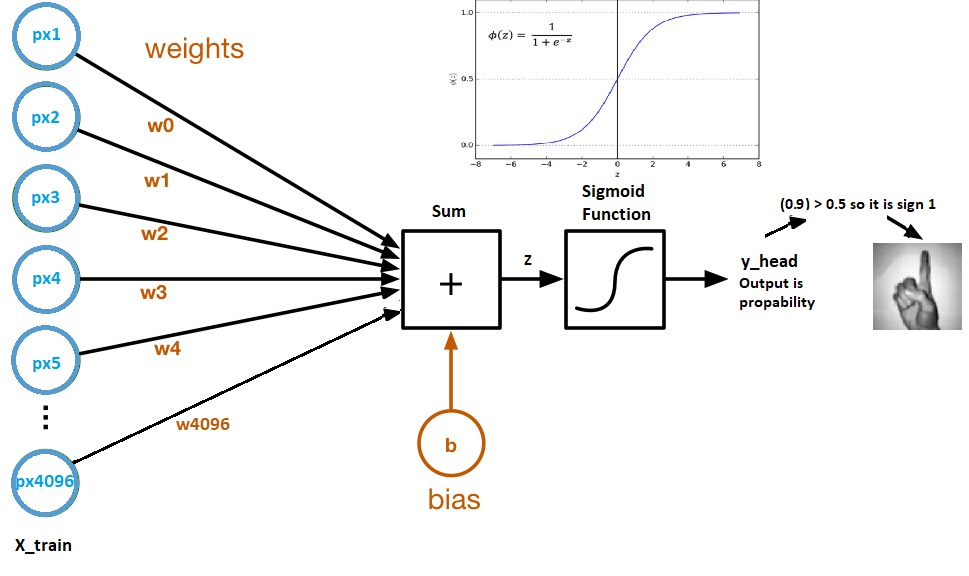

Sklearn has a great library to do all the codes down below. I'm doing this in order to understand basic maths behind it.

# Defining Neccesary Functions

## Initialize the weights and baises

In [8]:
def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

## Sigmoid Function

In [9]:
def sigmoid(z):
    
    y_head = 1 / (1+np.exp(-z))
    
    return y_head

To do forward propagation we need value of z. It can be seen on graph. After calculating z we put it into sigmoid function we defined. Then we will need losses which it's mathematical model is down below. After calculating loss value we will define cost which is the summation of loss function.

Loss Function: Log loss : 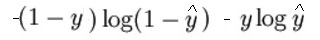

In [10]:
def forward_backward_propagation(w,b,x_train,y_head):
    
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head) - (1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    
    #backward propogation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients



To do backward propagation we need to read the mathematical graph backward. It means doing derrivative operation. After doing that we will store our cost and gradient values.


# Updating (Learning) Parameters

After doing backward propagation we will see that we need to update our parameters which are weights and bias. 

In [11]:
    
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost)) #if section defined to print our cost values in every 10 iteration. We do not need to do that. It's optional.
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
  
    return parameters, gradients, cost_list

# Prediction

In [12]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is one means has diabete (y_head=1),
    # if z is smaller than 0.5, our prediction is zero means does not have diabete (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

# Logistic Regression by combining all functions

In [13]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    

    # Print train/test Errors
    print("-------------------------------------")
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

In [14]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 180)

Cost after iteration 0: 0.695875
Cost after iteration 10: 0.691874
Cost after iteration 20: 0.688256
Cost after iteration 30: 0.684981
Cost after iteration 40: 0.682014
Cost after iteration 50: 0.679325
Cost after iteration 60: 0.676886
Cost after iteration 70: 0.674671
Cost after iteration 80: 0.672658
Cost after iteration 90: 0.670826
Cost after iteration 100: 0.669157
Cost after iteration 110: 0.667635
Cost after iteration 120: 0.666245
Cost after iteration 130: 0.664973
Cost after iteration 140: 0.663808
Cost after iteration 150: 0.662739
Cost after iteration 160: 0.661757
Cost after iteration 170: 0.660852
-------------------------------------
test accuracy: 64.0625 %


You can get higher accuracy with adjusting the larning speed and number of iterations. But after certain point your accuracy won't change. You can also see that from the cost graph. The graph's derrivative (slope) is decreasing (assume that the slope is positive) with increasing number of iteration. So after certain amount of iteration the cost function won't decrease.

# With Sklearn

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("Test Accuracy {}".format(lr.score(x_test.T,y_test.T)))

Test Accuracy 0.7447916666666666


Notebook inspired by: https://www.kaggle.com/code/sagira/logistic-regression-math-behind-without-sklearn